Convolutional neural network (CNN)
Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [2]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt

In [4]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 

4422102/4422102 [==============================] - 0s 0us/step


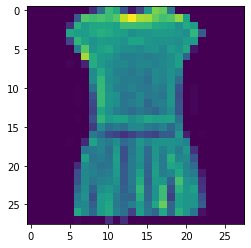

In [36]:
plt.imshow(x_train[3])

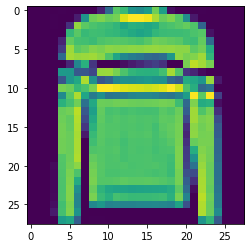

In [35]:
plt.imshow(x_train[5])

In [6]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# Add a channel dimension (since CNNs expect images to have a channel dimension)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [10]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))


In [12]:
# Flatten the output and add dense layers for classification
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3563 - accuracy: 0.8699 - val_loss: 0.3549 - val_accuracy: 0.8669
Epoch 2/3
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2913 - accuracy: 0.8932 - val_loss: 0.2934 - val_accuracy: 0.8916
Epoch 3/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2581 - accuracy: 0.9063 - val_loss: 0.2837 - val_accuracy: 0.8964


In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.2837 - accuracy: 0.8964
Test accuracy: 0.896399974822998


In [21]:
# Make predictions on the test set
predictions = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


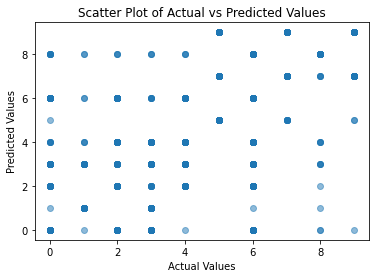

In [28]:
# Plot a scatter plot for actual vs predicted values
plt.scatter(y_test,np.argmax(predictions, axis=1), alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()